In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
start = datetime.date(2013, 1, 1)
end = datetime.date(2023, 1, 1)

In [13]:
NVDA = yf.download('NVDA', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [14]:
NVDA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,0.31400,0.31825,0.31275,0.31800,0.293560,478836000
2013-01-03,0.31800,0.32175,0.31450,0.31825,0.293791,298888000
2013-01-04,0.31875,0.32975,0.31775,0.32875,0.303484,524968000
2013-01-07,0.32850,0.32950,0.31700,0.31925,0.294714,610732000
2013-01-08,0.32000,0.32100,0.31000,0.31225,0.288252,466424000


In [16]:
INTC = yf.download('INTC', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [17]:
INTC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,21.150000,21.379999,21.049999,21.379999,15.386281,47623000
2013-01-03,21.400000,21.480000,21.139999,21.320000,15.343106,41054100
2013-01-04,21.360001,21.389999,21.049999,21.160000,15.227961,30142500
2013-01-07,21.280001,21.450001,21.180000,21.250000,15.292727,36352100
2013-01-08,21.230000,21.559999,21.020000,21.090000,15.177587,48672000


In [18]:
AMD = yf.download('AMD', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [19]:
ticker_symbols = ['NVDA', 'INTC', 'AMD']
bank_stocks = pd.concat([NVDA, INTC, AMD], keys=ticker_symbols, axis=1)

In [20]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [21]:
bank_stocks.head()

Bank Ticker     NVDA                                                  \
Stock Info      Open     High      Low    Close Adj Close     Volume   
Date                                                                   
2013-01-02   0.31400  0.31825  0.31275  0.31800  0.293560  478836000   
2013-01-03   0.31800  0.32175  0.31450  0.31825  0.293791  298888000   
2013-01-04   0.31875  0.32975  0.31775  0.32875  0.303484  524968000   
2013-01-07   0.32850  0.32950  0.31700  0.31925  0.294714  610732000   
2013-01-08   0.32000  0.32100  0.31000  0.31225  0.288252  466424000   

Bank Ticker       INTC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2013-01-02   21.150000  21.379999  21.049999  21.379999  15.386281  47623000   
2013-01-03   21.400000  21.480000  21.139999  21.320000  15.343106  41054100   
2013-01-04   21.360001  21.389999  21.049999  21.160000  15.227961  30142500   
2013-01-07   21.280001  21.450001  21.180000  21.250000  15.292727  36352100   
2013-01-08   21.230000  21.559999  21.020000  21.090000  15.177587  48672000   

Bank Ticker   AMD                                        
Stock Info   Open  High   Low Close Adj Close    Volume  
Date                                                     
2013-01-02   2.55  2.57  2.45  2.53      2.53  27214800  
2013-01-03   2.52  2.59  2.46  2.49      2.49  24966900  
2013-01-04   2.51  2.59  2.49  2.59      2.59  22054200  
2013-01-07   2.61  2.70  2.60  2.67      2.67  25575200  
2013-01-08   2.72  2.76  2.64  2.67      2.67  29140800

In [22]:
bank_stocks.xs('Close', axis=1, level='Stock Info').max()

Bank Ticker
NVDA     33.375999
INTC     68.470001
AMD     161.910004
dtype: float64

In [26]:
returns = bank_stocks.xs('Close', axis=1, level=1).pct_change()
change_func = np.vectorize(lambda x: x + ' Return')
returns.columns = change_func(returns.columns.values)
returns.head()

,NVDA Return,INTC Return,AMD Return
Date,,,
2013-01-02,NaN,NaN,NaN
2013-01-03,0.000786,-0.002806,-0.015810
2013-01-04,0.032993,-0.007505,0.040161
2013-01-07,-0.028897,0.004253,0.030888
2013-01-08,-0.021926,-0.007529,0.000000


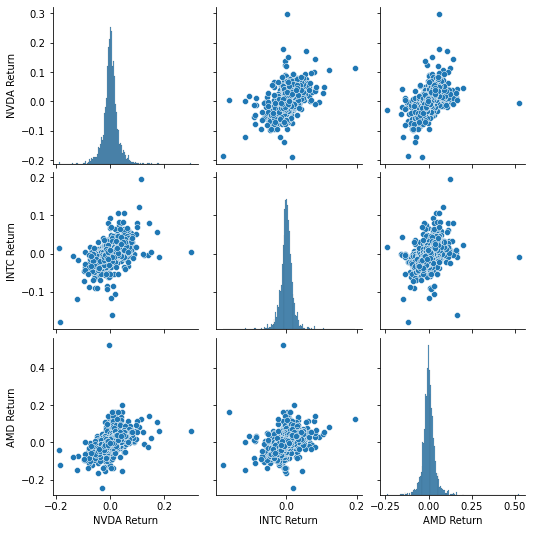

In [27]:
sns.pairplot(returns[1:])

In [28]:
returns.idxmin()

NVDA Return   2018-11-16
INTC Return   2020-03-16
AMD Return    2017-05-02
dtype: datetime64[ns]

In [29]:
returns.idxmax()

NVDA Return   2016-11-11
INTC Return   2020-03-13
AMD Return    2016-04-22
dtype: datetime64[ns]

In [30]:
returns.std()

NVDA Return    0.027891
INTC Return    0.019426
AMD Return     0.036802
dtype: float64

In [31]:
returns.loc[returns.index.strftime('%Y') == '2022'].std()

NVDA Return    0.039820
INTC Return    0.024117
AMD Return     0.038495
dtype: float64

In [32]:
returns.loc['2022-01-01': '2022-12-31'].std()

NVDA Return    0.039820
INTC Return    0.024117
AMD Return     0.038495
dtype: float64

In [33]:
plt.rcParams['patch.force_edgecolor'] = True

C:\Users\DR_OM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NVDA Return', ylabel='Density'>

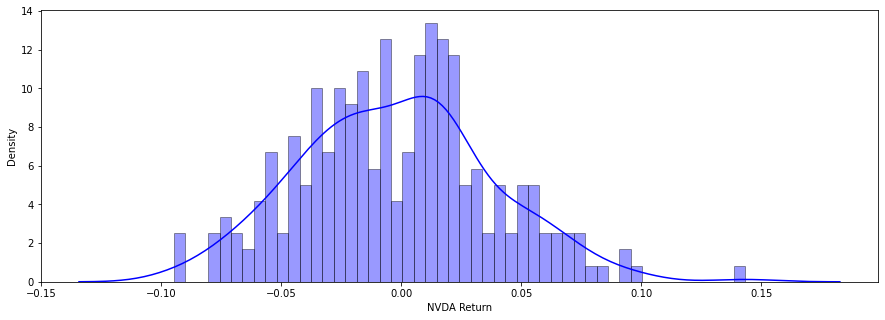

In [36]:
plt.figure(figsize = (15, 5))
sns.distplot(returns.loc['2022-01-01': '2022-12-31']['NVDA Return'], color='b', bins=50)

C:\Users\DR_OM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INTC Return', ylabel='Density'>

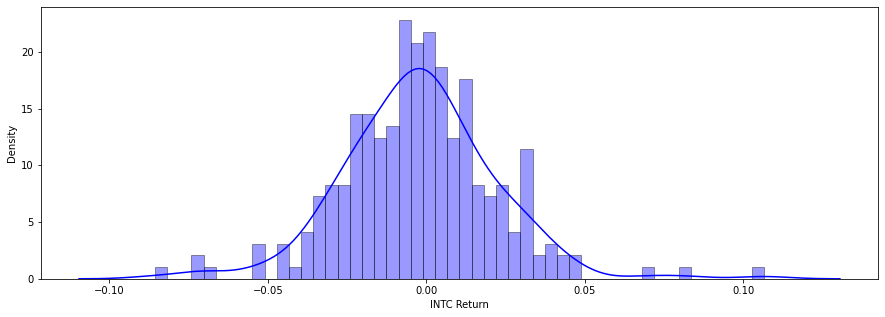

In [37]:
plt.figure(figsize = (15, 5))
sns.distplot(returns.loc['2022-01-01': '2022-12-31']['INTC Return'], color='b', bins=50)

C:\Users\DR_OM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMD Return', ylabel='Density'>

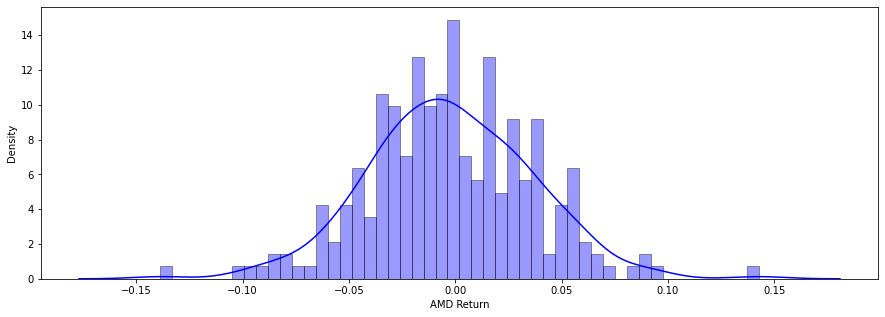

In [38]:
plt.figure(figsize = (15, 5))
sns.distplot(returns.loc['2022-01-01': '2022-12-31']['AMD Return'], color='b', bins=50)

In [41]:
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

In [45]:
closes = bank_stocks.xs(('Close'), axis=1, level=1)

RuntimeError: Can not put single artist in more than one figure

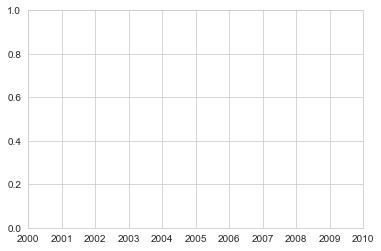

In [46]:
closes.plot(figure = (15, 5))

In [47]:
closes.iplot()

In [48]:
def last_DOM(any_day):
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)
    return next_month - datetime.timedelta(days=next_month.day)

In [53]:
NVDA_closes_2020 = closes.loc[closes.index.strftime('%Y') == '2020', 'NVDA'].to_frame() 
NVDA_closes_2020['Month'] = NVDA_closes_2020.index.map(lambda x: last_DOM(x))
NVDA_closes_2020.columns = ['NVDA close', 'Month']
NVDA_closes_2020_mean = NVDA_closes_2020.groupby('Month').mean()

InvalidIndexError: (slice(None, None, None), None)

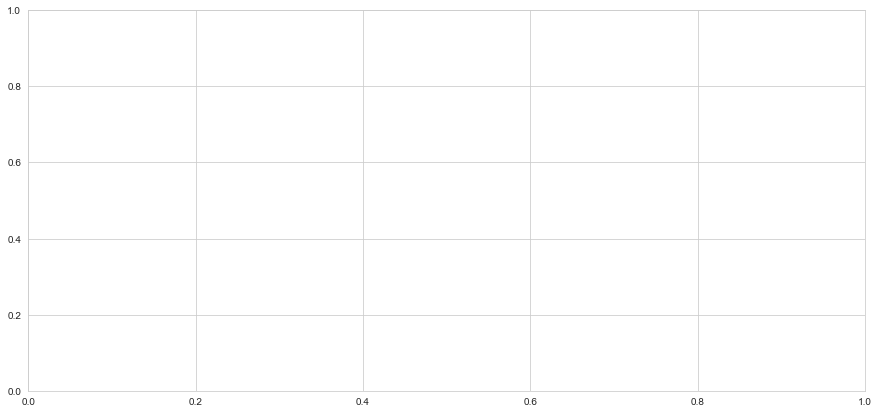

In [56]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(figsize=(15,7))

ax.plot(NVDA_closes_2020_mean, NVDA_closes_2020_mean['NVDA close'], 'b-', label='30 Day Avg')
ax.plot(NVDA_closes_2020.index, NVDA_closes_2020['NVDA close'], 'r-', label='NVDA CLOSE')
ax.set_xlabel('Month')
ax.xaxis.set_major_formatter(DateFormatter('%B - %Y'))

fig.legend(bbox_to_anchor=(1.11, 0.95))
fig.tight_layout()

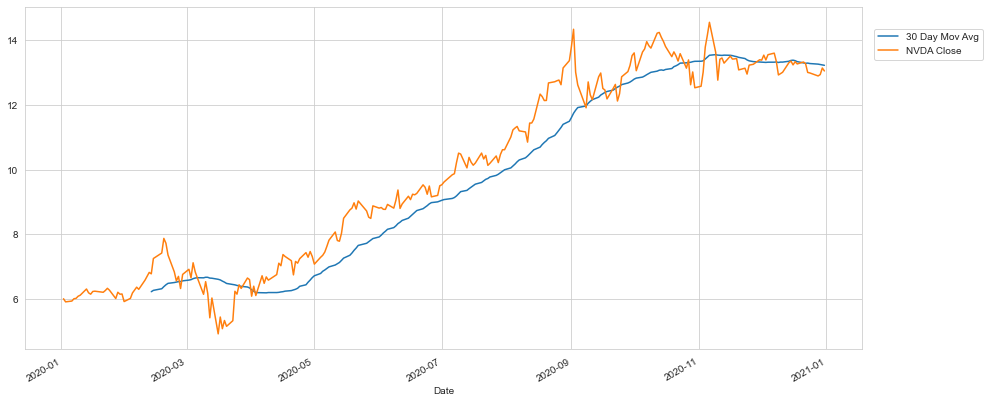

In [57]:
plt.figure(figsize=(15,7))
closes['NVDA'].loc['2020-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 Day Mov Avg')
closes['NVDA'].loc['2020-01-01':'2021-01-01'].plot(label='NVDA Close')
plt.legend(bbox_to_anchor=(1.15, 0.95))

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

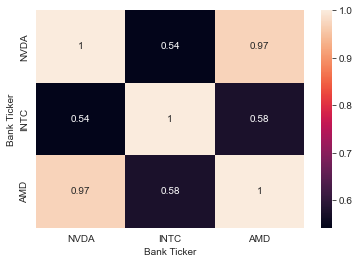

In [58]:
sns.heatmap(closes.corr(), annot=True)

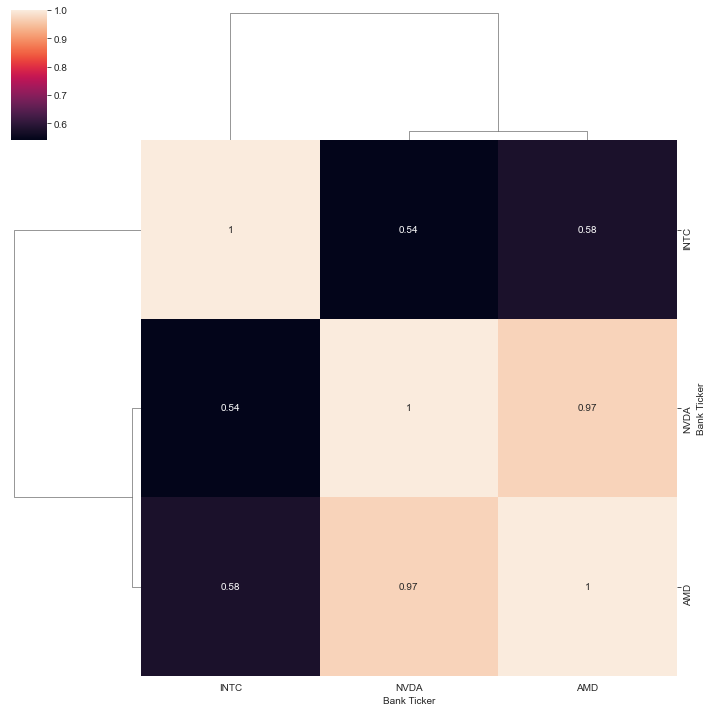

In [59]:
sns.clustermap(closes.corr(), annot=True)

In [60]:
bank_stocks['NVDA'][['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2021-01-01'].iplot(kind='candle')

In [61]:
bank_stocks['INTC'][['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2021-01-01'].iplot(kind='candle')

In [62]:
bank_stocks['NVDA']['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='boll')